# Project 3

### Lorenz Attractor, Relativistic Breit-Wigner Function, Inverson Method for Distributed Random Number Generation

#### Written by Owen Morehead - 4/15/2020


In [2]:
#Relevant modules

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]


## Exploring the Lorenz Attractor

The Lorenz system is a three dimensional system of ordinary differential equations (ODE's) which is known for having chaotic solutions for certain initial conditions and parameter values. One popular set of chaotic solutions of this system is known as the Lorenz attractor. 
The ODE's of the Lorenz system are:
$$\frac{dx}{dt} = \sigma(y-x)$$
$$\frac{dy}{dt} = x(\rho - z) - y$$
$$\frac{dz}{dt} = xy - \beta z$$

We choose parameter values $\sigma = 10$, $\rho = 28$, $\beta = 8/3$ to simulate the Lorenz attractor.

Initially you might think that tiny changes in the starting point would result in tiny changes in phase space trajectory, and therefore where the system ends up. It is important to remember that the system is deterministic: a precise starting position gives a precise prediction where the system will go. However, approximate knowledge makes it fundamentally impossible to predict where the system will be after a while. This is sometimes called deterministic chaos and is explored here.

<IPython.core.display.Javascript object>


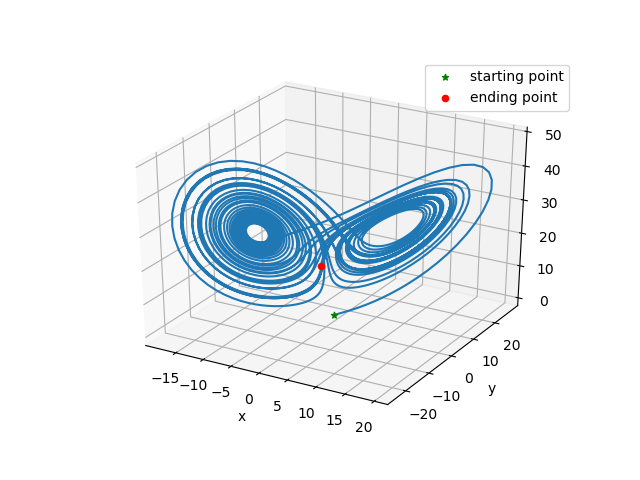

final x,y,z position is: [-0.46737123 -1.08428611 16.66983792]


In [5]:
#Lorenz attractor
%matplotlib notebook

rho = 28.0          #initializing constants
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    """Returns the three differential equtaions which describe the Lorenz Attractor
    """
    x, y, z = state #state vector for the system of equations
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]   #starting point 1,1,1
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.xlabel('x')
plt.ylabel('y')

ax.scatter(states[0,0], states[0,1], states[0,2], c='g', label='starting point', marker='*', )    #starting point
ax.scatter(states[-1,0], states[-1,1], states[-1,2], c='r', label='ending point', marker='o', ) #last point in trajectory
plt.legend()
plt.show()

print('final x,y,z position is:', states[-1,:])   #the final state value x,y,z

<IPython.core.display.Javascript object>


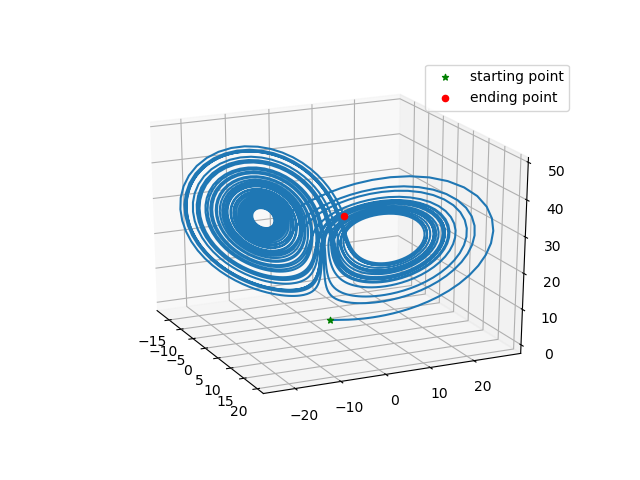

final x,y,z position is: [-0.82784048  5.32347926 28.83464405]


In [4]:
#changing initial parameters slightly

# code translated from Wikipedia's page, Lorenz attractor.
%matplotlib notebook

rho = 28.0          #initializing constants
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    """Returns the three differential equtaions which describe the Lorenz Attractor
    """
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.00000000000001, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
ax.scatter(states[0,0], states[0,1], states[0,2], c='g', label='starting point', marker='*', )    #starting point
ax.scatter(states[-1,0], states[-1,1], states[-1,2], c='r', label='ending point', marker='o', ) #last point in trajectory
plt.legend()
plt.show()

print('final x,y,z position is:', states[-1,:])   #the final state value x,y,z



Text(0.5, 1.0, 'Distance traveled vs change in initial position')

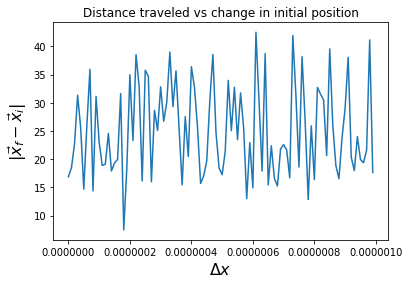

In [6]:
#another tecnique where I plot the distance magnitude (final minus initial position)
#against the change in the starting position

%matplotlib inline
rho = 28.0          #initializing constants
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    """Returns the three differential equtaions which describe the Lorenz Attractor
    """
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

x0s = np.arange(1,1.000001,0.00000001)
t = np.arange(0.0, 40.0, 0.01)
distances = []
deltax = []   

for x in x0s:   #looping over and running odeint for every initial x value
    deltax.append(x-x0s[0])
    state0 = [x,1.0,1.0]
    states = odeint(f, state0, t)
    
    x0,y0,z0 = state0   #unpacking the initial state value

    x1,y1,z1 = states[-1,0],states[-1,1],states[-1,2]   #unpacking the final state value

    distance = np.sqrt((x0-x1)**2+(5-y1)**2+(z0-z1)**2)  #calculating the distance

    distances.append(distance)

plt.plot(deltax,distances)
plt.xlabel(r'$\Delta x$', fontsize=16)
plt.ylabel(r'$\left|\vec{x}_{f}-\vec{x}_{i}\right|$',fontsize=16)
plt.title('Distance traveled vs change in initial position')

We see that the change in initial position does not have any coorelation to the distance traveled by the system. This plot shows the random fluctuations in the distance traveled. This is deterministic chaos.

[-0.46737123 -1.08428611 16.66983792]


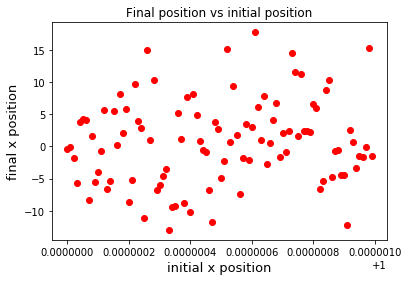

In [6]:
#similar to above plot here. Just plotting the final position as a function of initial position
%matplotlib inline

rho = 28.0          #initializing constants
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    """Returns the three differential equtaions which describe the Lorenz Attractor
    """
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives


x0s = np.arange(1,1.000001,0.00000001)   #list of values to use as initial x value

t = np.arange(0.0, 40.0, 0.01)

#fig = plt.figure()
#ax = fig.gca(projection='3d')



print(states[-1,:])
for x in x0s:
    state0 = [x, 1.0, 1.0]
    states = odeint(f, state0, t)
    final_xstate = states[-1,0]
    plt.plot(x,final_xstate,c='r',marker='o')
    #ax.scatter(states[-1,0], states[-1,1], states[-1,2], c='r', marker='o', )
    
#plt.draw()
plt.xlabel('initial x position',fontsize=13)
plt.ylabel('final x position',fontsize=13)
plt.title('Final position vs initial position')
plt.show()

We can clearly see the deterministic chaotic behavior in this plot. There is no numerical relationship between the final and initial position values. This is very much chaotic. 

----------------------
## Trapezoid Rule Integrator
Here we explore diffraction of visible light at a straight edge (such as the edge of a blade) [here](https://dlmf.nist.gov/7.SB1). The intensity of light varies with perpendicular distance from the edge.
The intensity is given by
$$
I = \frac{I_0}{2} \left\{ [C(v) + 0.5]^2 + [S(v)+0.5]^2 \right\},
$$
where $I_0$ is the intensity of the incident light, $v$ is proportional to the distance from the edge, and $C(v)$ and $S(v)$ are the Fresnel integrals
$$
C(v) = \int_0^v \cos(\pi w^2/2) dw
$$
and 
$$
S(v) = \int_0^v \sin(\pi w^2/2) dw.
$$
Here we write a trapezoid rule integrator to evaluate $I/I_0$ as a function of $v$. 

Text(0.5, 1.0, 'Diffraction of light vs distance')

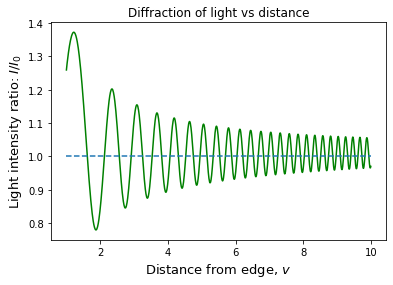

In [8]:
%matplotlib inline

def C(v):
    """Returns the Fresnel integrand C(v)
    """
    return np.cos((np.pi*v**2)/2)

def S(v):
    """Returns the Fresnel integrand S(v)
    """
    return np.sin((np.pi*v**2)/2)

ivalue = 0.0  #bottom limit of integration
#fvalue = 5.
N = 1001

w = np.zeros(N).astype('float')

sumtC = sumtS = 0.0
wsum = 0.0
intensity = 0.0

fvalues = np.arange(1,10,.01)
ys = [1 for i in fvalues]  #used to plot a line, y = 1 against our plot
intensity_list = []

for fvalue in fvalues: #trapezoid rule integration
    h = (fvalue-ivalue)/(N-1)
    w = h*(w+1.)
    w[0]=w[N-1]=h/2
    v = 0
    sumtC = 0
    sumtS = 0
    wsum = 0
    intensity = 0
    for i in range(1,N+1):
        v = ivalue + (i-1)*h
        sumtC += w[i-1]*C(v)
        sumtS += w[i-1]*S(v)
        wsum += w[i-1]
    intensity = 0.5*((sumtC+0.5)**2 + ((sumtS+0.5)**2))
    intensity_list.append(intensity)
    #print(intensity)

plt.plot(fvalues,intensity_list,'g-')
plt.plot(fvalues,ys,'--')
plt.xlabel('Distance from edge, $v$',fontsize=13)
plt.ylabel('Light intensity ratio: $I/I_0$',fontsize=13)
plt.title('Diffraction of light vs distance')

-------------
## Exploring the Relativistic Breit-Wigner Function
Say we set up an experiment in which an electron and a positron collide with center-of-mass energy, $E$, to enable the production of a new, massive particle: $e^+e^- \rightarrow X$. You'd think that, to conserve energy and momentum, the reaction would only happen when $E=M$ (we are working in "natural" units that set $c=\hbar=1$.), where $M$ is the rest mass of the $X$ particle. This is called a resonance. However, as you know from the uncertainty principle, a state with a short lifetime has an intrinsic uncertainty in its energy, and therefore its rest mass. The width of the distribution is inversely proportional to the lifetime. If $X$ has a short lifetime, there is a range of energies for which the reaction can occur, hence the resonance has a width.

The relativistic Breit-Wigner function describes this resonance, given the width $\Gamma$ (set by the lifetime of the $X$ particle, which has mass $M$):

$$
f(E) = \frac{k}{(E^2 - M^2)^2 + M^2 \Gamma^2},
$$
where the scaling factor $k$ is 
$$k = \frac{2\sqrt{2} M \Gamma \gamma}{\pi \sqrt{M^2 + \gamma}},$$
and $\gamma = \sqrt{M^2 (M^2 + \Gamma^2)}$. 


 a) Plotting the Breit-Wigner distribution for a hypothetical X particle having $M=90\,\text{GeV}$ and $\Gamma = 10\,\text{GeV}$, over the range of E from 0 to 180 GeV.
	
 b) Using Simpson's rule to integrate the Breit-Wigner distribution in order to find out what fraction of particles we will keep if say we choose to select only those particles produced within $\pm 3 \Gamma$ of the B-W peak.
 
Note that this is a reasonably realistic particle physics example as the $Z$ boson has $M=91.2\,\text{GeV}$ and $\Gamma=2.5\,\text{GeV}$.



Peak resonance value is 0.06395542862454201
[180]
Peak resonance occurs at 90.0 GeV


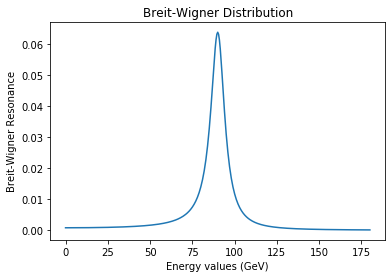

In [10]:
#(a)  Plotting the Breit-Wigner function

M = 90.
T = 10.

funct_values = []

def breit_wigner(E):
    """Returns the value of the Breit-Wigner function 
       for a collision with a center-of-mass energy, E
    """
    lam = math.sqrt(M**2*(M**2 + T**2))
    k = (2*math.sqrt(2)*M*T*lam)/((math.pi)*math.sqrt(M**2 + lam))
    return k/((E**2 - M**2)**2 + M**2*T**2)

energies = np.arange(0,180.5,0.5)
for e in energies:
    funct = breit_wigner(e)
    funct_values.append(funct)
    
plt.plot(energies,funct_values)
plt.title('Breit-Wigner Distribution')
plt.xlabel('Energy values (GeV)')
plt.ylabel('Breit-Wigner Resonance')

print('Peak resonance value is', max(funct_values))

#quick way to find the resonsnace peak's indice value
m = max(funct_values)
print([i for i, j in enumerate(funct_values) if j == m])
print('Peak resonance occurs at', energies[180],'GeV')

#peak of curve is at energy value E = 90GeV.
#This occurs at the 180th indice
#Energy values from 0 to 180 in steps of 0.5 so there are 360 indices.
#Since resonance peak occurs at 180th indice, this cooresponds to 90GeV

In [11]:
#(b)  Apply Simpsons rule integration and display the results 

#pm 3τ = pm 30GeV 
#E = 0 to 180GeV. Integral from 0 to 180 gives full are under resonance curve
fvalue = 180.
ivalue = 0.
N = 1001  #(N-1) intervals

h = (fvalue - ivalue)/(N-1)
w = np.empty(N) ;  w.fill(2.*h/3.)
w[1::2] = 2. * w[1::2]  #double every other weight value to be 4/3 h
                        #starting with second element in set (element 1)
w[0] = w[-1] = h/3.   #set ends of weight set equal to h/3

sums = 0.0
wsum = 0.0
for i in range(1,N+1):
    E = ivalue + (i-1)*h
    sums += w[i-1] * breit_wigner(E)
    wsum += w[i-1]
    
print('Simpson integral result = ', sums)
print('\n Weight sum = ', wsum)
print ('\n Simpson error = ','%.5e' %(sums/1.-1.))  #value of integral should equal 1

Simpson integral result =  0.9958324756836001

 Weight sum =  180.0000000000018

 Simpson error =  -4.16752e-03


In [12]:
#We want to now integrate from 3τ = +/- 30GeV ]
#from the central peak, 90GeV

#integrate from E = 60GeV to E = 120GeV

ivalue = 60.
fvalue = 120.
N = 1001 
h = (fvalue - ivalue)/(N-1)
w = np.empty(N) ;  w.fill(2.*h/3.)
w[1::2] = 2. * w[1::2]  #double every other weight value to be 4/3 h
                        #starting with second element in set (element 1)
w[0] = w[-1] = h/3.   #set ends of weight set equal to h/3

sums_some = 0.0
wsum_some = 0.0
for i in range(1,N+1):
    E = ivalue + (i-1)*h
    sums_some += w[i-1] * breit_wigner(E)
    wsum_some += w[i-1]


print('Simpson integral result from plus minus 30GeV from resonance peak = ', sums_some)

Simpson integral result from plus minus 30GeV from resonance peak =  0.9041197374584141


In [14]:
print("""The fraction of particles under the area of the 
Breit-Wigner resonance curve from plus/minus
30GeV from the resonance peak is:  %.5f or %.5f percent""" %(sums_some, sums_some*100))

The fraction of particles under the area of the 
Breit-Wigner resonance curve from plus/minus
30GeV from the resonance peak is:  0.90412 or 90.41197 percent


-------------------
## Inversion Method

Starting with a uniform random number generator, here we use the inversion method to generate a large set ($N=10^6$ or more) of random numbers distributed as a triangle:

$$w(x)=Ax$$

for $x$ between 0 and 10. Below calculating the normalization, $A$. Plotted is a histogram of the random number distribution. In addition we also use the Von Neumann rejection method to generate a set of random numbers distributed as a triangle (though this method is less efficient).

$$x_i = \sqrt{\frac{2r_i}{A}}$$ 


$$A = 2/10^2 = 1/50$$

probabilties by bin from histogram:  [0.0100045 0.0299959 0.0500357 0.0700688 0.0898584 0.110235  0.1299858
 0.1499022 0.1699352 0.1899785]
calculated probablities by bin:  [0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19]
check sums of probs each type:  1.0 1.0


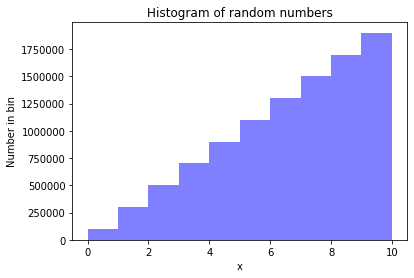

In [15]:
%matplotlib inline
#Inversion Method

N = 10000000
ranx2 = np.zeros(N).astype('float')
A = 1/50
r1 = np.random.random(N)
ranx2 = (2*r1/A)**(1./2.)
bins = [0,1,2,3,4,5,6,7,8,9,10]

#histogram of data
n, binsa, patches = plt.hist(ranx2, bins, facecolor='blue', alpha=0.5, align='mid')
plt.xlabel('x')
plt.ylabel('Number in bin')
plt.title(r'Histogram of random numbers')

#checking expected and calculated bin probabilities
probsh=n/N
print ("probabilties by bin from histogram: ",probsh)
probsc=probsh*0.
psum=0.
hsum=0.
for i in range (0,len(n)):
    probsc[i]=1/100*(pow(bins[i+1],2)-pow(bins[i],2))
    psum+=probsc[i]
    hsum+=probsh[i]
print ("calculated probablities by bin: ", probsc)
print("check sums of probs each type: ",psum, hsum)


The bin contents: [  75.  299.  530.  672.  864. 1072. 1346. 1549. 1677. 1916.]


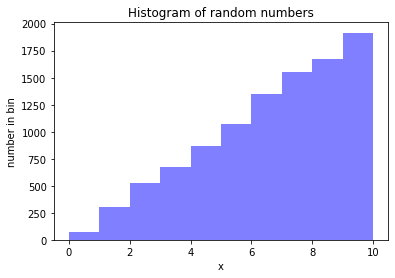

mean of distribution is:  6.677
<x> = 6.695817694257337
sqrt(<x^2> - <x>^2) = 1.170553748093407


In [16]:
#Von Neumann integration method

def w(x):
    return (1/50*x)

N = 10000
ranx2 = np.zeros(N).astype('float')
i = 0
while (i<N):
    r1,r2 = 10.*np.random.random(2)
    if (r2<w(r1)):
        ranx2[i]=r1
        i+=1
bins=[0,1,2,3,4,5,6,7,8,9,10]

#histogram of data
n, binsa, patches = plt.hist(ranx2, bins, facecolor='blue', alpha=0.5, align='mid')
plt.xlabel('x')
print ("The bin contents:",n)
plt.ylabel('number in bin')
plt.title(r'Histogram of random numbers')
 
plt.show()

#calculating the mean of the linear distribution
q = 0
for i in range(len(n)):
   q += n[i] * ((bins[i] + bins[i+1]) / 2) 
mean = q / np.sum(n)
print("mean of distribution is: ", mean)

print(r"<x> = {}".format(np.average(ranx2)))
print(r"sqrt(<x^2> - <x>^2) = {}".format(np.std(ranx2)/np.sqrt(4)))

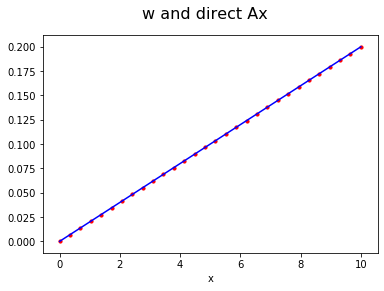

probabilties by bin from histogram:  [0.0075 0.0299 0.053  0.0672 0.0864 0.1072 0.1346 0.1549 0.1677 0.1916]
calculated probablities by bin:  [0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19]
check sums of probs each type:  1.0 1.0


In [17]:
#checking that we got what we expected:
#    plot w(x), and integrate it over the interval to make sure it is normalized
#    calculate probability for each bin (integrate w(x) over each bin)
#    compare with the fraction of generated numbers actually in each bin

x = np.linspace(0,10,30)
plt.plot(x, w(x), "b")
plt.scatter(x, x/50, 10, 'r')
plt.xlabel("x")
plt.suptitle('w and direct Ax', fontsize=16)
plt.show()
probsh=n/N
print ("probabilties by bin from histogram: ",probsh)
probsc=probsh*0.
psum=0.
hsum=0.
for i in range (0,len(n)):
    probsc[i]=1/100*(pow(bins[i+1],2)-pow(bins[i],2)) 
    # probsc = value of (integral of Aw(x))= x^2/100 under each bin               
    psum+=probsc[i]  
    hsum+=probsh[i]
print ("calculated probablities by bin: ", probsc)
print("check sums of probs each type: ",psum, hsum)

In [18]:
#integrate w over the interval to ensure we got the correct normalization. I'll reuse the Simpson rule code.
A = 0.0    #integrate from 0 to 10, we chose 10 bins
B = 10.0
N = 12001
# N points => (N-1) intervals

h = (B - A)/(N - 1)
wts=np.empty(N) ; wts.fill(2.*h/3.)  
wts[1::2] = 2. * wts[1::2] # double every other one to be 4/3 h, starting with element 1 (the second in the set)
wts[0] = h/3. # overwrite the zeroth and last elements (the ends of the set)
wts[-1] = h/3.
sums = 0.0
wsum=0.
for i in range(1, N + 1):  
    y = A + (i - 1)*h
    sums  += wts[i-1] * w(y)
    wsum += wts[i-1]
    
print('Simpson result = ', sums)
print('\n Weight sum = ', wsum)

Simpson result =  1.0

 Weight sum =  10.000000000001249


In [19]:
#quicker way to make the linear distribution and gather parameters without making a plot

A = 1/50.
N = 10**7
xs = np.sqrt(np.random.rand(N,4)) * np.sqrt(2/A)   #generating a list of lists of 4 random elements following the distribution
sums = np.average(xs, axis=1)  #averaging the 4 values in each list to generate a list of single averaged values

print('average of distribution is:', np.average(sums))
print('standard deviation of distribution is:', np.std(sums))

average of distribution is: 6.666973998459884
standard deviation of distribution is: 1.1786346589339898


Now we draw 4 of the numbers from the triangle distribution and add the four numbers together. We histogram and describe the results after doing this to the whole sample. We can also relate each of these to the triangle distribution from which the numbers were drawn, and explain the resulting shape of the distribution of the summed numbers.

10000000
2500000


Text(0.5, 1.0, 'Histogram of sum of 4 random numbers')

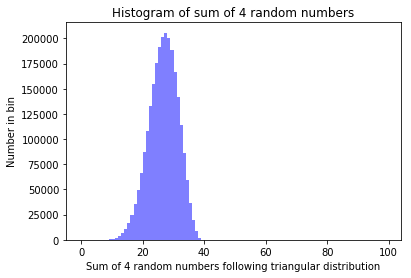

In [20]:
#same initial code as above inversion method to re initialize variables that got changed from Von Neumann method above.
N = 10000000
ranx2 = np.zeros(N).astype('float')
A = 1/50
r1 = np.random.random(N)
ranx2 = (2*r1/A)**(1./2.)
bins = [0,1,2,3,4,5,6,7,8,9,10]

    
#below is a while loop which sums 4 of the numbers in ranx2 and appends that value to a list sums4. 
#loop stops when the looping indice is equal to the length of ranx2 aka we've looped through every value in ranx2.

print(len(ranx2))
j = 0
sums4 = []
while j <= len(ranx2):
    val1 = val2 = val3 = val4 = tot = 0
    val1 = ranx2[j]
    tot += val1
    j+=1
    val2 = ranx2[j]
    tot += val2
    j+=1
    val3 = ranx2[j]
    tot += val3
    j+=1
    val4 = ranx2[j]
    tot += val4
    sums4.append(tot)
    #print(tot)
    j += 1
    if j == len(ranx2):
        break

print(len(sums4))  #good to see that there are 2500000 values in this list. This equals 10e^6 / 4

#plotting a histogram of our summed numbers
bins = np.arange(0,100)
m, bins, patches = plt.hist(sums4, bins, facecolor='blue', alpha=0.5, align='mid')
plt.xlabel('Sum of 4 random numbers following triangular distribution')
plt.ylabel('Number in bin')
plt.title(r'Histogram of sum of 4 random numbers')


In [21]:
#calculating the mean of our data

s = 0
for i in range(len(m)):
   s += m[i] * ((bins[i] + bins[i+1]) / 2) 
mean = s / np.sum(m)
print("mean of distribution is: ", mean)

mean of distribution is:  26.6664524


mean of distribution is: 733.345448
rms of distribution is:  27.08035169638681
rms of distribution is:  27.080347310930563


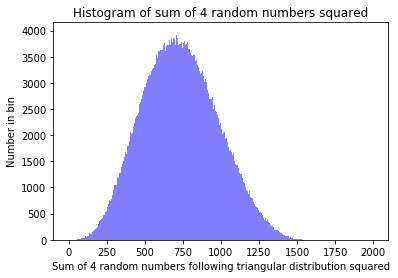

In [22]:
#calculating the rms of the distribution
#squaring the values in sums4, the total of 4 numbers from the triangular distribution, find the mean, then squareroot

sums4_sq = [m**2 for m in sums4]
bins = np.arange(0,2000)
p, bins, patches = plt.hist(sums4_sq, bins, facecolor='blue', alpha=0.5, align='mid')
plt.xlabel('Sum of 4 random numbers following triangular distribution squared')
plt.ylabel('Number in bin')
plt.title(r'Histogram of sum of 4 random numbers squared')

s = 0
for i in range(len(p)):
   s += p[i] * ((bins[i] + bins[i+1]) / 2) 
mean_sq = s / np.sum(p)

print("mean of distribution is:", mean_sq)
print("rms of distribution is: ", mean_sq**(0.5))
#finding the rms a slightly different way
print("rms of distribution is: ",np.sqrt(np.average(np.array(sums4)**2.)))

In [24]:
#quicker way to find the mean and standard deviation of this distribution of the sum of 4 of the numbers from the linear distribution

xs = np.sqrt(np.random.rand(N,4)) * np.sqrt(2/A) #again making a list of lists of 4 elements from the distribution
sums = np.sum(xs, axis=1)       #summing the 4 values in each of the sub lists. Now sums is a list of single values.
xs_sq = [s**2 for s in sums]


print('mean of distribution is:', np.average(xs_sq))
print('standard deviation of distribution is:', np.std(sums))

mean of distribution is: 733.2440843347078
standard deviation of distribution is: 4.7142985623047045


Description and observations:

We see that this distribution of the sum of 4 random numbers from the triangular distribution we gave, follows a normalized gaussian distribution.
It is good to see that our data follows a normalized distribution. When we take many trials, a histogram of the value of the sum of 4 random values from the distribution should yield a gaussian curve with a peak at the average value of the sum of the 4 numbers. This peak seems to be around 26.7. 

This makes sense when we think about our linear triangular distribution from x = 0 to 10. The mean of this distribution was 6.6. If we multiply this by 4 we get 26.4. This value is very close to the mean of our distribution of the 4 random numbers added together. This is a good confirmation. 

Our linear distribution of random numbers is normalized and hence on average when we add up 4 of these numbers many times we should obtain a curve peaked at 4 times the mean of the linear distribution which is what we see.

The central limit theorum is applied to this distribution. It states that the sum of a number distributed random variables with finite varainces will tend to a normalized distribution as the number of random variables grows. 